In [1]:
################################################################################
                      # Importando as Bibliotecas
################################################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import data_table
data_table.enable_dataframe_formatter()
import warnings
warnings.filterwarnings('ignore')
import sklearn.model_selection as ms
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler 

In [2]:
################################################################################
                # Importando e Concatenando os DataFrames
################################################################################

# England Premier League
df_ENG1 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/England%20Premier%20League_20212022.xlsx?raw=true')
# England Championship
df_ENG2 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/England%20Championship_20212022.xlsx?raw=true')
# France Ligue 1
df_FRA1 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/France%20Ligue%201_20212022.xlsx?raw=true')
# France Ligue 2
df_FRA2 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/France%20Ligue%202_20212022.xlsx?raw=true')
# Germany Bundesliga
df_GER1 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/Germany%20Bundesliga_20212022.xlsx?raw=true')
# Germany 2. Bundesliga
df_GER2 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/Germany%202.%20Bundesliga_20212022.xlsx?raw=true')
# Italy Serie A
df_ITA1 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/Italy%20Serie%20A_20212022.xlsx?raw=true')
# Italy Serie B
df_ITA2 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/Italy%20Serie%20B_20212022.xlsx?raw=true')
# Spain La Liga
df_SPA1 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/Spain%20La%20Liga_20212022.xlsx?raw=true')
# Spain Segunda División
df_SPA2 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/Spain%20Segunda%20Divisi%C3%B3n_20212022.xlsx?raw=true')

# Concatenando os DataFrames
df = [df_ENG1,df_ENG2,df_FRA1,df_FRA2,df_GER1,df_GER2,df_ITA1,df_SPA1,df_SPA2]
df = pd.concat(df)
df = df[['Home','Away','FT_Odds_H','FT_Odds_D','FT_Odds_A','FT_Goals_H','FT_Goals_A']]

In [3]:
df

,Home,Away,FT_Odds_H,FT_Odds_D,FT_Odds_A,FT_Goals_H,FT_Goals_A
0,Brentford,Arsenal,3.90,3.40,2.05,2,0
1,Manchester United,Leeds United,1.62,4.15,5.25,5,1
2,Burnley,Brighton & Hove Albion,3.20,3.00,2.31,1,2
3,Chelsea,Crystal Palace,1.27,5.40,9.40,3,0
4,Everton,Southampton,1.84,3.65,3.85,3,1
...,...,...,...,...,...,...,...
463,Girona FC,SD Eibar,2.25,3.25,3.15,0,1
464,UD Las Palmas,CD Tenerife,1.91,3.20,3.75,1,2
465,SD Eibar,Girona FC,2.37,3.25,3.15,0,2
466,Girona FC,CD Tenerife,2.10,3.20,3.85,0,0


In [4]:
################################################################################
                # Organizando do DataFrame
################################################################################

# Criando a Coluna de 0 e 1 para análise do Modelo de Machine Learning
df.loc[(df['FT_Goals_H'] != df['FT_Goals_A']), 'LTD'] = 1
df.loc[(df['FT_Goals_H'] == df['FT_Goals_A']), 'LTD'] = 0

# Separando os DataFrames para análise do Profit
df1 = df[['Home','Away','FT_Odds_H','FT_Odds_D','FT_Odds_A','FT_Goals_H','FT_Goals_A','LTD']]
df2 = df[['FT_Odds_H','FT_Odds_D','FT_Odds_A','LTD']]

In [5]:
################################################################################
                # Separar Dados em Treino e Teste
################################################################################

x1 = df1.iloc[:, :].values
y1 = df1.iloc[:, -1].values

x1_train, x1_test, y1_train, y1_test = ms.train_test_split(x1, y1, test_size = 0.3, random_state = 0)

df1 = pd.DataFrame(x1_test)
df1.columns = ['Home','Away','FT_Odds_H','FT_Odds_D','FT_Odds_A','FT_Goals_H','FT_Goals_A','LTD']


x2 = df2.iloc[:,:-1].values
y2 = df2.iloc[:, -1].values

x2_train, x2_test, y2_train, y2_test = ms.train_test_split(x2, y2, test_size = 0.3, random_state = 0)

In [6]:
x1_train

array([['Metz', 'Brest', 3.05, ..., 0, 1, 1.0],
       ['Lazio', 'Napoli', 2.8, ..., 1, 2, 1.0],
       ['Southampton', 'Newcastle United', 1.79, ..., 1, 2, 1.0],
       ...,
       ['Ajaccio', 'Dunkerque', 1.47, ..., 2, 1, 1.0],
       ['Lazio', 'Sassuolo', 1.73, ..., 2, 1, 1.0],
       ['Elche CF', 'Levante UD', 2.55, ..., 1, 1, 0.0]], dtype=object)

In [7]:
x2_train

array([[3.05, 3.25, 2.41],
       [2.8 , 3.5 , 2.5 ],
       [1.79, 3.72, 4.17],
       ...,
       [1.47, 3.28, 7.6 ],
       [1.73, 3.9 , 4.4 ],
       [2.55, 3.1 , 2.75]])

In [8]:
x1_test

array([['Spezia', 'Venezia', 2.1, ..., 1, 0, 1.0],
       ['Werder Bremen', 'Hannover 96', 1.95, ..., 1, 1, 0.0],
       ['Real Sociedad', 'Athletic Club Bilbao', 2.05, ..., 1, 1, 0.0],
       ...,
       ['Leeds United', 'Newcastle United', 2.08, ..., 0, 1, 1.0],
       ['Nice', 'Angers SCO', 1.64, ..., 1, 0, 1.0],
       ['Nürnberg', 'Hansa Rostock', 1.91, ..., 1, 0, 1.0]], dtype=object)

In [9]:
x2_test

array([[2.1 , 3.4 , 3.4 ],
       [1.95, 3.4 , 3.3 ],
       [2.05, 3.2 , 4.  ],
       ...,
       [2.08, 3.75, 3.5 ],
       [1.64, 3.65, 4.6 ],
       [1.91, 3.3 , 4.2 ]])

In [10]:
################################################################################
                           # Treinando o Modelo
################################################################################

classifier = SVC(kernel='rbf')
classifier.fit(x2_train, y2_train)

SVC()

In [11]:

################################################################################
                                # Previsão
################################################################################
 
y2_pred = classifier.predict(x2_test)
y2_result = np.concatenate((y2_pred.reshape(len(y2_pred),1), y2_test.reshape(len(y2_test),1)),1)

In [12]:
################################################################################
                            # Matriz de Confusão
################################################################################
 
cm = confusion_matrix(y2_test, y2_pred)
print(cm)
print(accuracy_score(y2_test, y2_pred))


[[  0 281]
 [  0 781]]
0.7354048964218456


In [13]:
# jogos totais usados para teste
jogos_total_teste = confusion_matrix(y2_test, y2_pred)[0][0]+confusion_matrix(y2_test, y2_pred)[0][1]+confusion_matrix(y2_test, y2_pred)[1][0]+confusion_matrix(y2_test, y2_pred)[1][1]
jogos_total_teste

1062

In [14]:
# quantidade total de entrada
jogos_entrada = confusion_matrix(y2_test, y2_pred)[0][1]+confusion_matrix(y2_test, y2_pred)[1][1]
jogos_entrada

1062

In [15]:
# calculando a taxa de entrada
taxa_de_entrada = (jogos_entrada/jogos_total_teste)*100
taxa_de_entrada

100.0

In [16]:
# calculando a taxa de acerto
taxa_de_acerto = (confusion_matrix(y2_test, y2_pred)[1][1]/jogos_entrada)*100
taxa_de_acerto

73.54048964218455

Nº
1062    12.523138
Name: Profit_acu, dtype: object

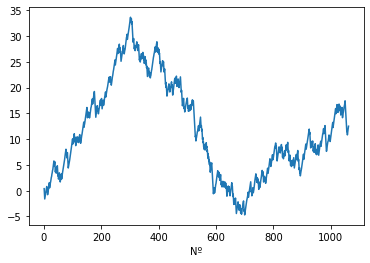

In [17]:
################################################################################
                      # Profit Acumulado do Teste
################################################################################

df1["Previsões"] = y2_pred

stake = 1
green = stake / (df1.FT_Odds_D - 0.90)
red = -stake

df1.loc[(df1['Previsões'] == 1) & (df1['LTD'] == 1), 'Profit'] = green
df1.loc[(df1['Previsões'] == 1) & (df1['LTD'] == 0), 'Profit'] = red
df1.loc[(df1['Previsões'] == 0) & (df1['LTD'] == 1), 'Profit'] = 0
df1.loc[(df1['Previsões'] == 0) & (df1['LTD'] == 0), 'Profit'] = 0

filtro = df1.Previsões == 1
df0 = df1[filtro]

# Ajustando o Índice
df0.reset_index(inplace=True, drop=True)
df0.index = df0.index.set_names(['Nº'])
df0 = df0.rename(index=lambda x: x + 1)

df0['Profit_acu'] = df0.Profit.cumsum()
df0.Profit_acu.plot()
df0.Profit_acu.tail(1)

In [18]:
ROI = df0.Profit_acu.tail(1)/len(df0)*100
ROI

Nº
1062    1.179203
Name: Profit_acu, dtype: object